# Визуальный анализ данных с помощью Python

### API библиотеки matplotlib

Официальная документация по matplotlib - https://matplotlib.org/index.html.

In [2]:
#Корректное отображение графиков прямо в jupyter'e
%matplotlib inline
#Все функции matplotlib API, в частности plot и close, находятся в модуле matplotlib.pyplot
import matplotlib.pyplot as plt
import numpy as np

Графики в matplotlib существуют внутри объекта рисунка Figure. Создать новый рисунок можно методом plt.figure.

Нельзя создать график, имея пустой рисунок. Сначала нужно создать один или несколько подграфиков с помощью метода add_subplot: 

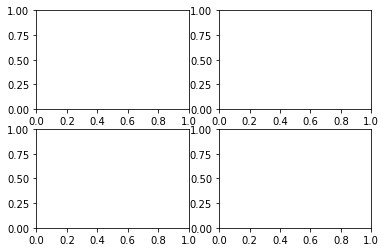

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ах2 = fig.add_subplot(222) 
ax3 = fig.add_subplot(223)  
ax4 = fig.add_subplot(224)  

# If you are creating many figures, make sure you explicitly call "close"
# on the figures you are not using, because this will enable pylab
# to properly clean up the memory.

-----------

<img width = '400px' ALIGN='left' src="images/lesson_2/5179abf54c6fbad394dfef5ec2817828.png">

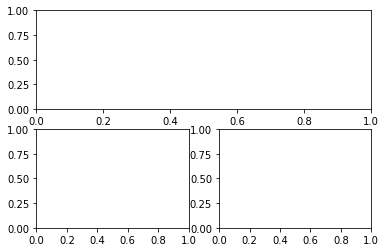

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ах2 = fig.add_subplot(223) 
ax3 = fig.add_subplot(224)   

In [5]:
from numpy.random import randn

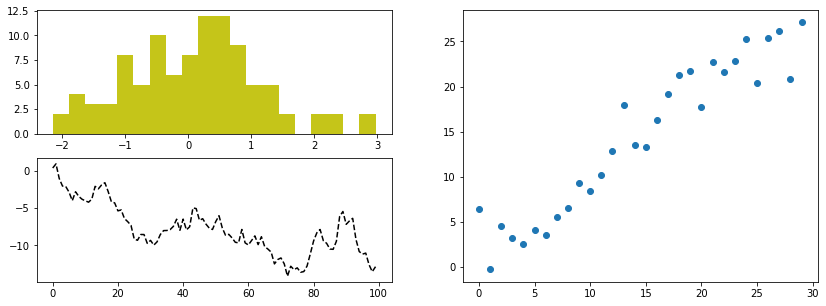

In [6]:
fig = plt.figure(figsize= (14,5))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(122) 
ax3 = fig.add_subplot(223) 


plt.plot(randn(100).cumsum(), 'k--')
# Метод fig.add_subplot возвращает объект AxesSubplot, что позволяет рисовать в любом подrрафике, вызывая методы этого объекта:
f = ax1.hist(randn(100), bins=20, color='y', alpha=0.9)
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30)) 

In [7]:
f

(array([ 2.,  4.,  3.,  3.,  8.,  5., 10.,  6.,  8., 12., 12.,  9.,  5.,
         5.,  2.,  0.,  2.,  2.,  0.,  2.]),
 array([-2.15321804, -1.89690808, -1.64059812, -1.38428816, -1.1279782 ,
        -0.87166824, -0.61535828, -0.35904832, -0.10273836,  0.1535716 ,
         0.40988156,  0.66619152,  0.92250148,  1.17881144,  1.4351214 ,
         1.69143136,  1.94774132,  2.20405128,  2.46036125,  2.71667121,
         2.97298117]),
 <a list of 20 Patch objects>)

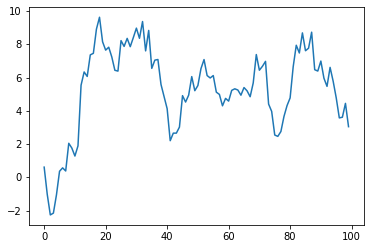

In [8]:
#Отдельно данный метод тоже будет работать, так как при необходимости он автоматически создаст рисунок и подграфик
plt.plot(randn(100).cumsum())

 Поскольку создание рисунка с несколькими подграфиками, расположенными определенным образом, - типичная задача, существует вспомогательный метод plt.subplots, который создает новый рисунок и возвращает массив NumPy, содержащий созданные в нем объекты подграфиков: 

<class 'matplotlib.figure.Figure'> <class 'numpy.ndarray'>


<BarContainer object of 10 artists>

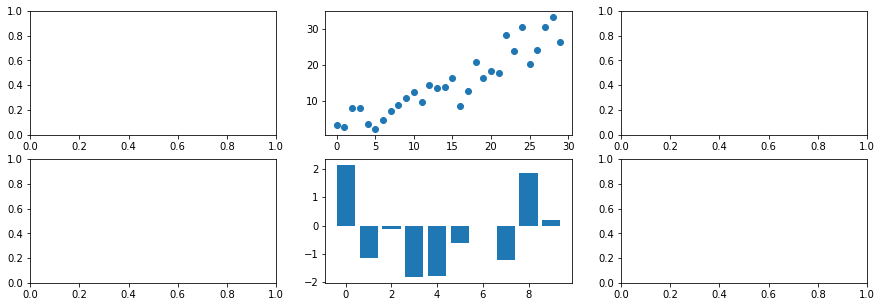

In [9]:
fig, axes = plt.subplots(2, 3)
fig.set_figheight(5)
fig.set_figwidth(15)
print(type(fig), type(axes))

axes[0,1].scatter(np.arange(30), np.arange(30) + 3 * randn(30)) 
axes[1,1].bar(np.arange(10),  randn(10)) 

In [10]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c4e6d1050>,
      dtype=object)

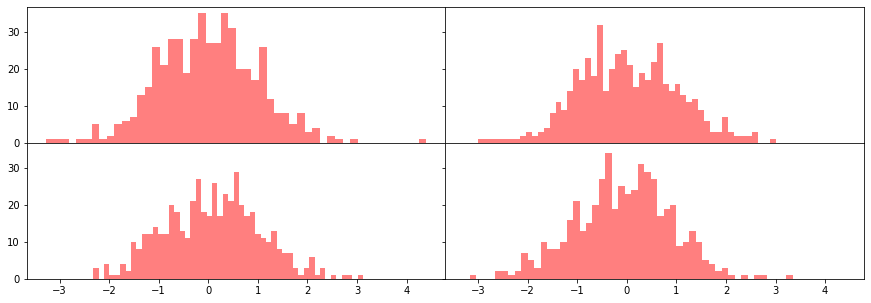

In [11]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
fig.set_figheight(5)
fig.set_figwidth(15)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color= 'r', alpha=0.5) 
#Достаточно популярный способ задания пустого пространства вокруг графиков         
plt.subplots_adjust(wspace=0.0, hspace=0.0) 

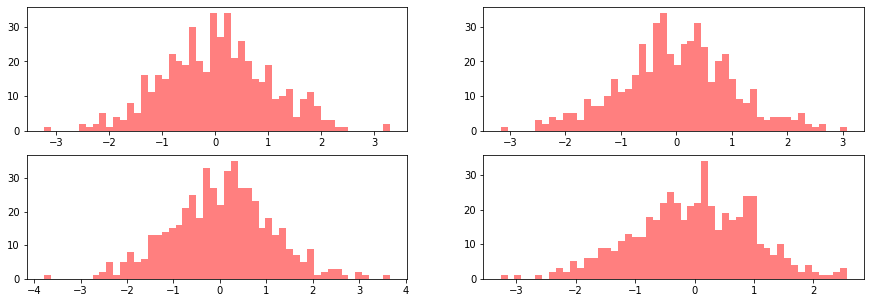

In [12]:
#Обратить внимание на общую ось 
fig, axes = plt.subplots(2, 2, sharex=False, sharey=False)
fig.set_figheight(5)
fig.set_figwidth(15)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color= 'r', alpha=0.5) 
#Достаточно популярный способ задания пустого пространства вокруг графиков         
plt.subplots_adjust(wspace=0.2, hspace=0.2) 

### Конфигурирование matplotlib 

В начальной конфигурации matplotlib заданы цветовые схемы и умолчания, ориентированные главным образом на подготовку рисунков к публикации. По счастью, почти все аспекты поведения по умолчанию можно сконфигурировать с помощью обширного набора глобальных параметров, определяющих размер рисунка, промежутки между подграфикам:и, цвета, размеры шрифтов, стили сетки и т. д.

In [13]:
#Задает глобально размер рисунка
plt.rc('figure', figsize=(10, 10))
font_options = {'family' : 'monospace'} 
plt.rc('font', **font_options) 

### Упражнение

In [14]:
x = ['Java', 'Python', 'PHP', 'JavaScript', 'C#', 'C++']
popularity = [22.2, 17.6, 8.8, 8, 7.7, 6.7]

Для выполнения упражнения необходимо изучить следующие методы объекта subplot axes:
    - set_xlabel/set_ylabel
    - set_title
    - grid

### Визуализация с помощью Pandas

Датасет - https://www.kaggle.com/open-powerlifting/powerlifting-database.

In [15]:
import pandas as pd

In [16]:
df = pd.read_csv('files/lesson_2/openpowerlifting.csv', sep = ',')

In [17]:
df.head(2)

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386414 entries, 0 to 386413
Data columns (total 17 columns):
MeetID            386414 non-null int64
Name              386414 non-null object
Sex               386414 non-null object
Equipment         386414 non-null object
Age               147147 non-null float64
Division          370571 non-null object
BodyweightKg      384012 non-null float64
WeightClassKg     382602 non-null object
Squat4Kg          1243 non-null float64
BestSquatKg       298071 non-null float64
Bench4Kg          1962 non-null float64
BestBenchKg       356364 non-null float64
Deadlift4Kg       2800 non-null float64
BestDeadliftKg    317847 non-null float64
TotalKg           363237 non-null float64
Place             385322 non-null object
Wilks             362194 non-null float64
dtypes: float64(10), int64(1), object(6)
memory usage: 50.1+ MB


In [19]:
cols = ['Equipment', 'Age',  'BodyweightKg', 'WeightClassKg', 'BestSquatKg','BestBenchKg','BestDeadliftKg','Place','TotalKg','Sex']
df = df[cols]
df.head()

,Equipment,Age,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,Place,TotalKg,Sex
0,Wraps,47.0,59.60,60,47.63,20.41,70.31,1,138.35,F
1,Single-ply,42.0,58.51,60,142.88,95.25,163.29,1,401.42,F
2,Single-ply,42.0,58.51,60,142.88,95.25,163.29,1,401.42,F
3,Raw,42.0,58.51,60,NaN,95.25,NaN,1,95.25,F
4,Raw,18.0,63.68,67.5,NaN,31.75,90.72,1,122.47,F


Реализация функции plot в pandas основана на библиотеке matplotlib.

#### Одномерные данные

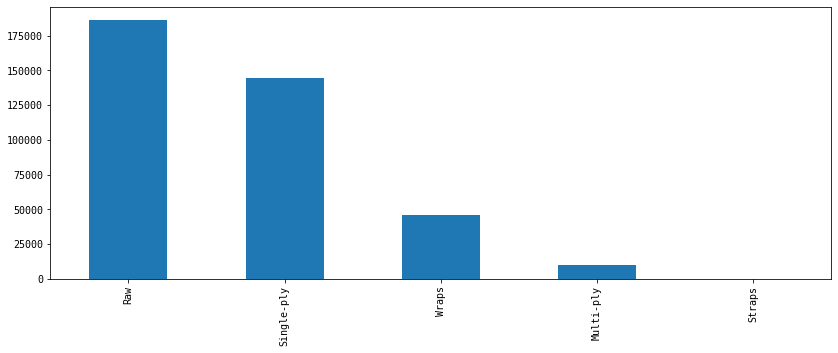

In [20]:
fig = plt.figure(figsize= (14,5))
df['Equipment'].value_counts().plot.bar()
#Bar Chart (столбчатая диаграмма) - классический интсрумент для отображения информации по категориям

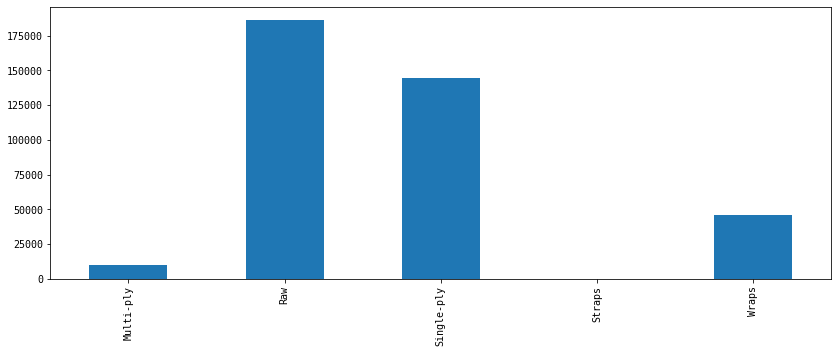

In [21]:
fig = plt.figure(figsize= (14,5))
df['Equipment'].value_counts().sort_index().plot.bar()

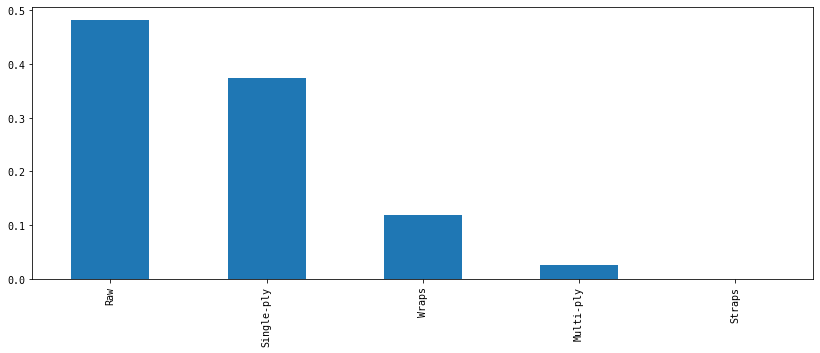

In [22]:
#Можно посмотреть относительные наблюдения
fig = plt.figure(figsize= (14,5))
(df['Equipment'].value_counts() / len(df)).plot.bar()

In [23]:
df.groupby(['Equipment'])[['BodyweightKg','TotalKg']].mean()

,BodyweightKg,TotalKg
Equipment,,
Multi-ply,102.474594,564.909626
Raw,85.221058,387.071285
Single-ply,86.649009,428.380619
Straps,116.571429,388.214286
Wraps,91.546736,534.348735


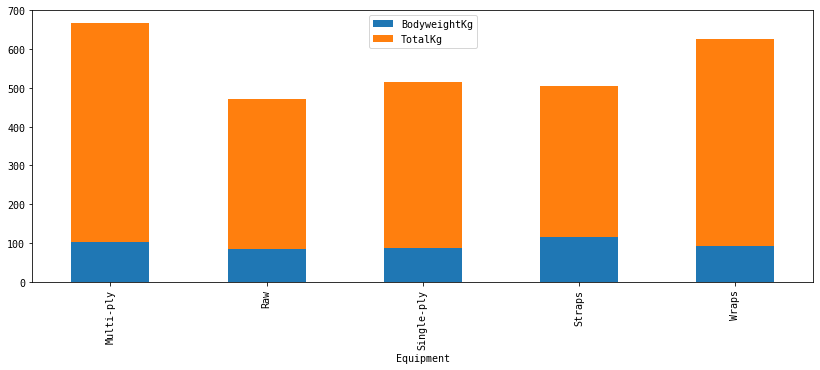

In [24]:
df.groupby(['Equipment'])[['BodyweightKg','TotalKg']].mean().plot.bar(figsize=(14,5),stacked = True)

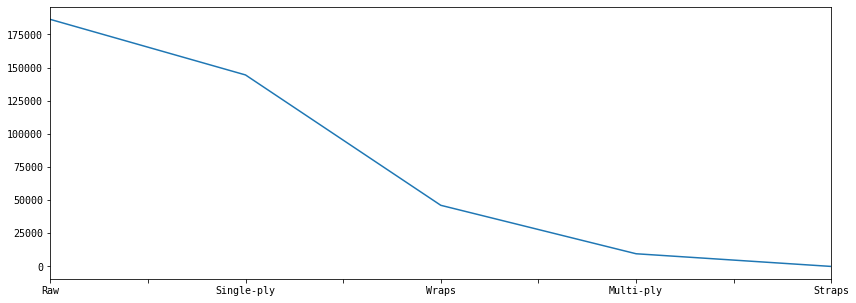

In [25]:
#Используется при большом количестве вариантов категориальной переменной (более 20 значений) 
fig = plt.figure(figsize= (14,5))
chart = df['Equipment'].value_counts().plot.line()
plt.show()

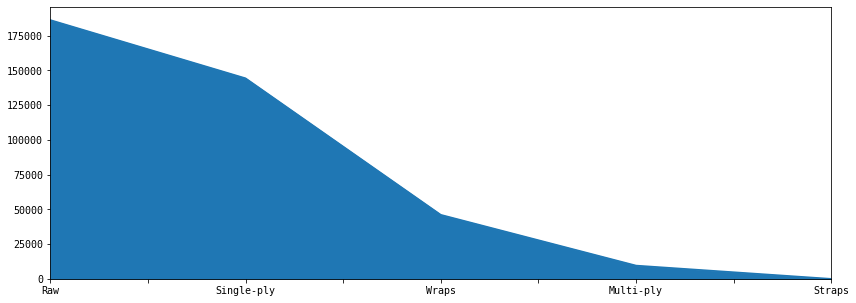

In [26]:
fig = plt.figure(figsize= (14,5))
chart = df['Equipment'].value_counts().plot.area()

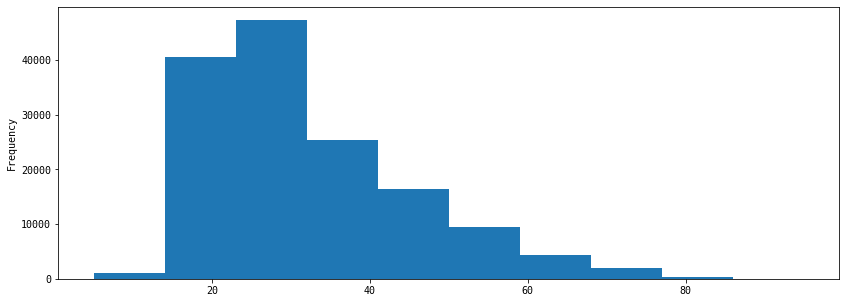

In [27]:
fig = plt.figure(figsize= (14,5))
df['Age'].plot.hist(bins= 10)
#Гистограмма - классический инстрмуент для визуализации интервальных данных
#Визуально похожа на столбчатую диаграмму,гистограмма разбивает данные на равные интервалы и рисует частоты в каждом из столбцов

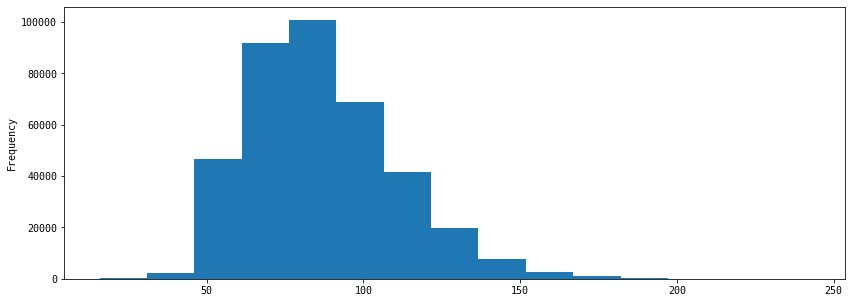

In [28]:
fig = plt.figure(figsize= (14,5))
df['BodyweightKg'].plot.hist(bins = 15)
# параметр bins

#### Двумерные данные

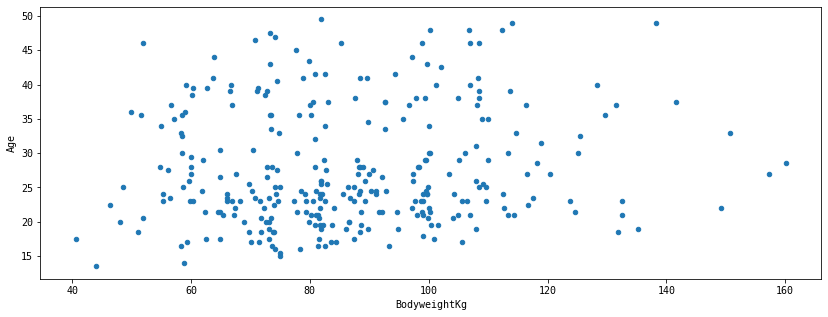

In [29]:
df[df['Age']<50].sample(300).plot.scatter(x='BodyweightKg', y='Age',figsize=(14,5))
#Используется для того, чтобы показать зависимость одного показателя от другого

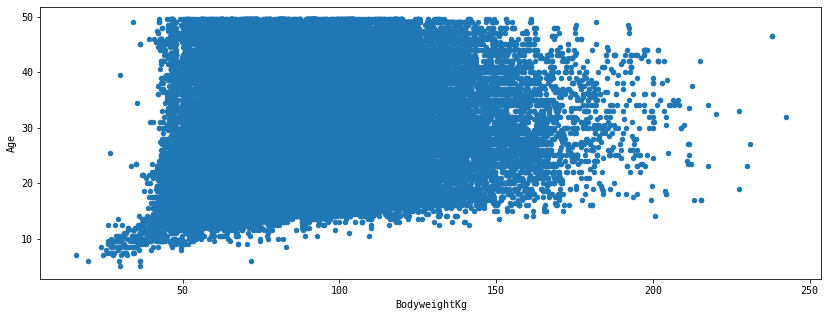

In [30]:
df[df['Age']<50].plot.scatter(x='BodyweightKg', y='Age',figsize=(14,5))
#Получается очень непонятно

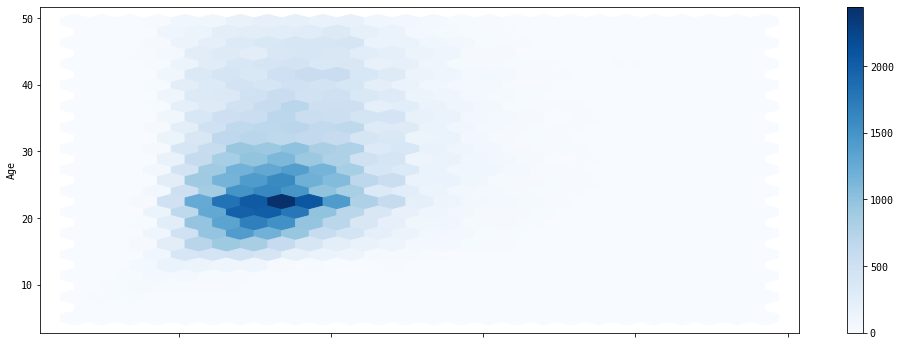

In [31]:
df[df['Age']<50].plot.hexbin(x='BodyweightKg', y='Age',figsize=(17,6), gridsize = 25,cmap ='Blues')

### Визуализация с помощью Seaborn

Seaborn также реализован на matplotlib. Outofbox решение для построения визуализаций.

In [32]:
import seaborn as sns

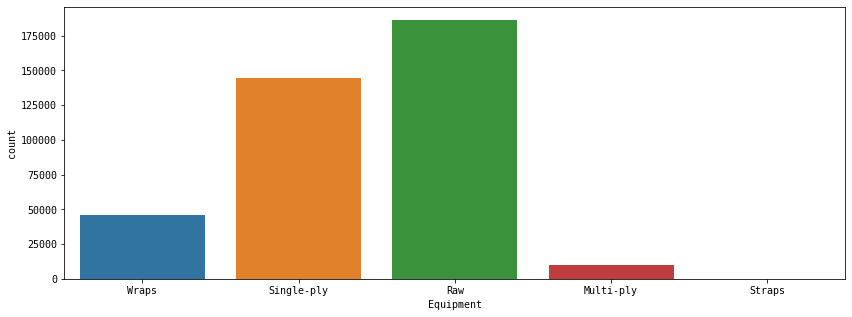

In [33]:
fig = plt.figure(figsize= (14,5))
sns.countplot(df['Equipment'])
#pandas bar = seaborn countplot
#Делается намного проще, нет нужды в агрегации с помощью value_counts

/home/max/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/max/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


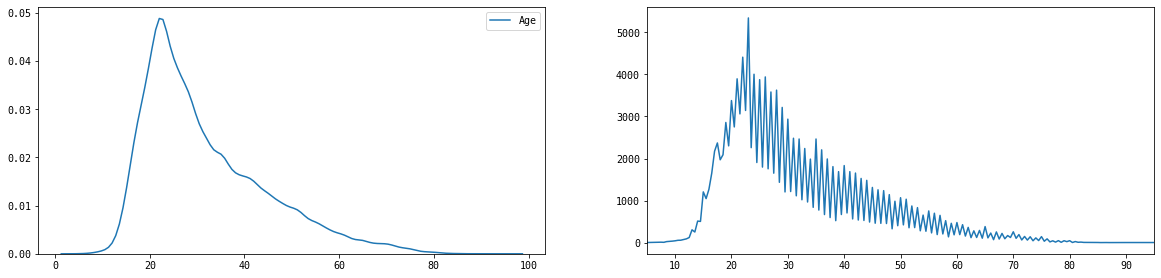

In [34]:
fig = plt.figure(figsize= (20,10))
ax1 = fig.add_subplot(221)
sns.kdeplot(df.Age)
#В статистике - оценка плотности ядра - один из вариантов сглаживания
ax2 = fig.add_subplot(222) 
df['Age'].value_counts().sort_index().plot.line()

/home/max/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


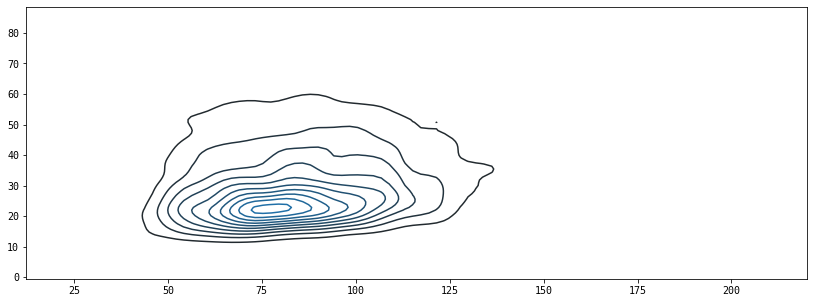

In [35]:
fig = plt.figure(figsize= (14,5))
sns.kdeplot(df.loc[:, ['BodyweightKg','Age']].dropna().sample(5000))

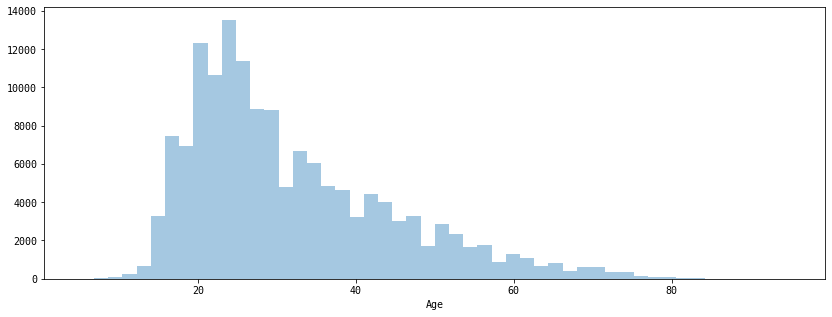

In [36]:
#Аналог гистограммы
fig = plt.figure(figsize= (14,5))
sns.distplot(df['Age'].dropna(),kde = False)

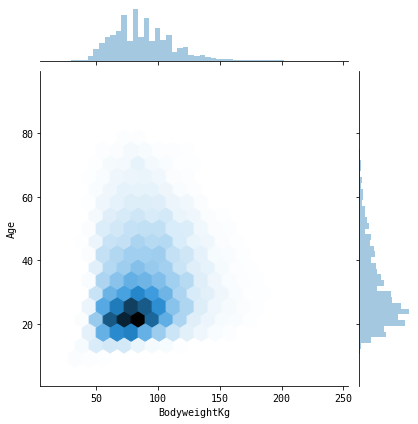

In [37]:
#Аналог scatterplot
sns.jointplot(x='BodyweightKg', y='Age', data=df, kind = 'hex',gridsize=20)

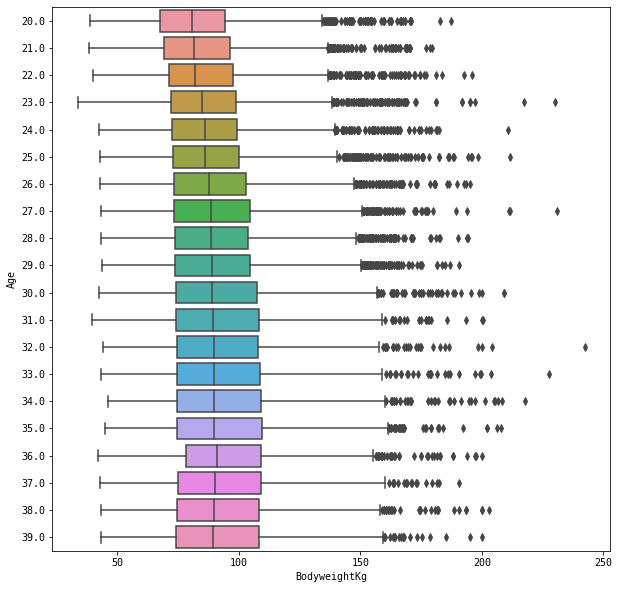

In [38]:
sns.boxplot(y="Age", x="BodyweightKg", data=df[df.Age.isin(np.arange(20,40,1))], orient="h")

Границами ящика служат первый и третий квартили (25-й и 75-й процентили соответственно), линия в середине ящика — медиана (50-й процентиль). Концы усов — края статистически значимой выборки (без выбросов), и они могут определяться несколькими способами. Наиболее распространённые значения, определяющие длину «усов»:

- Минимальное и максимальное наблюдаемые значения данных по выборке (в этом случае выбросы отсутствуют);
- Разность первого квартиля и полутора межквартильных расстояний; сумма третьего квартиля и полутора межквартильных расстояний.

<img width = '500px' src="images/lesson_2/d0ff538d59154901b18a98469de07fde.png">

Данные, выходящие за границы усов (выбросы), отображаются на графике в виде точек, маленьких кружков или звёздочек. Иногда на графике отмечают среднее арифметическое и его доверительный интервал («зарубка» на ящике). Иногда зарубками обозначают доверительный интервал для медианы.

В связи с тем, что не существует единого общего согласия относительно того, как конкретно строить «ящик с усами», при виде такого графика необходимо искать информацию в сопроводительном тексте относительно того, по каким параметрам ящик с усами строился.

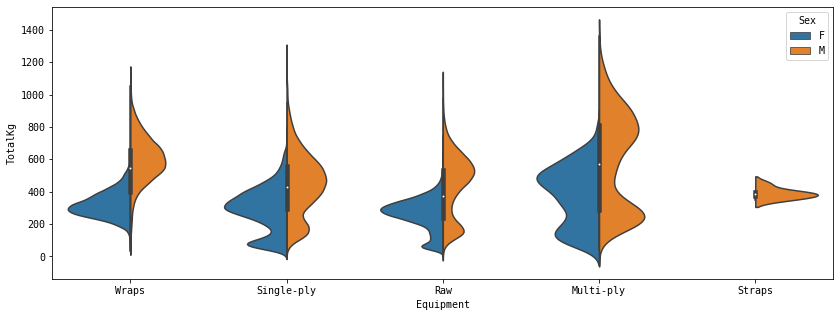

In [39]:
fig = plt.figure(figsize= (14,5))
sns.violinplot(y="TotalKg", x="Equipment",hue = 'Sex', split = True,data=df)

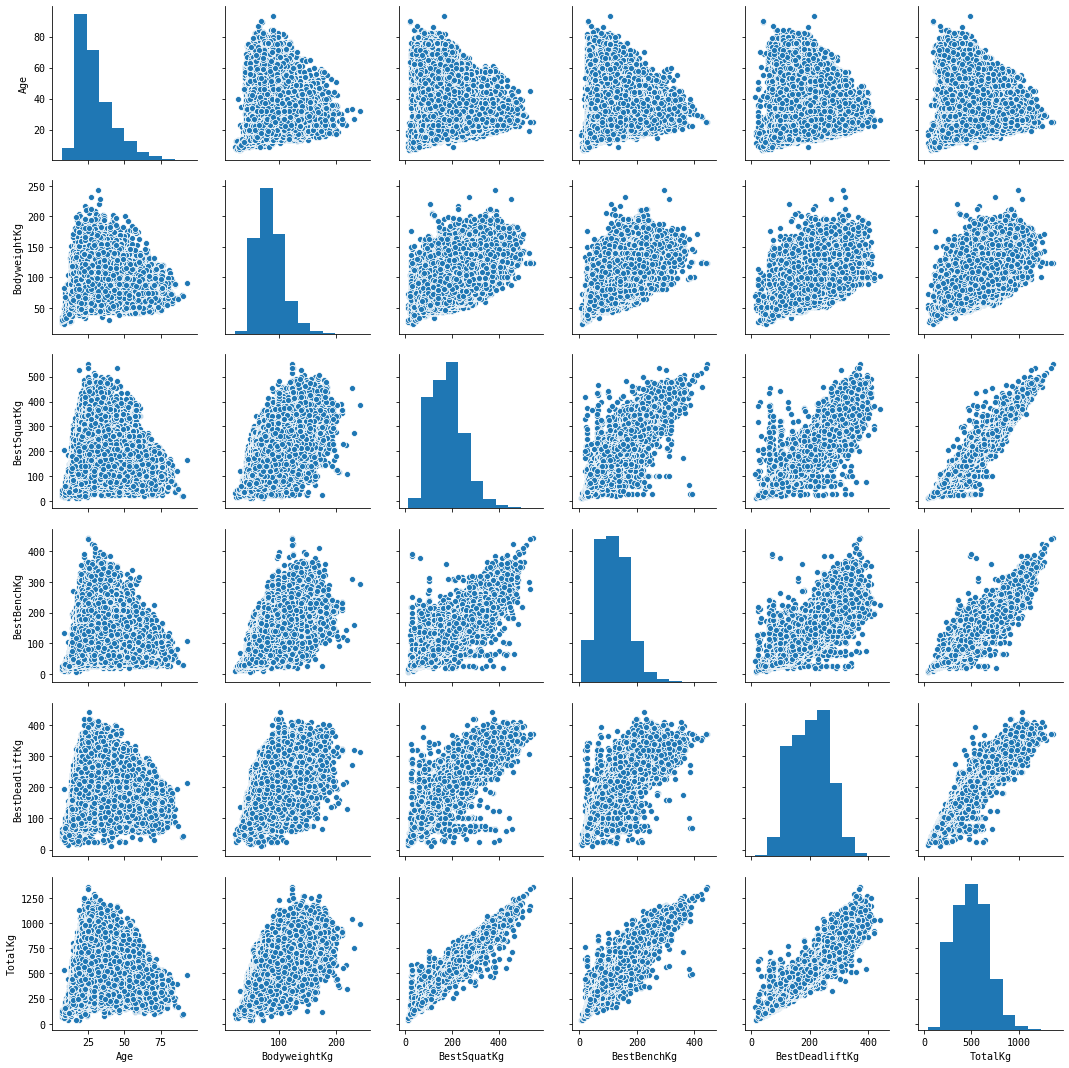

In [40]:
cols = ['Age', 'BodyweightKg',  'BestSquatKg',
       'BestBenchKg', 'BestDeadliftKg','TotalKg']
sns_plot = sns.pairplot(df[cols].dropna())

In [41]:
#Корреляция признаков
df[cols].dropna().corr()

,Age,BodyweightKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg
Age,1.000000,0.105304,-0.033262,0.034416,-0.037814,-0.016395
BodyweightKg,0.105304,1.000000,0.653468,0.663675,0.639829,0.674406
BestSquatKg,-0.033262,0.653468,1.000000,0.911109,0.907187,0.976384
BestBenchKg,0.034416,0.663675,0.911109,1.000000,0.877505,0.956819
BestDeadliftKg,-0.037814,0.639829,0.907187,0.877505,1.000000,0.962902
TotalKg,-0.016395,0.674406,0.976384,0.956819,0.962902,1.000000


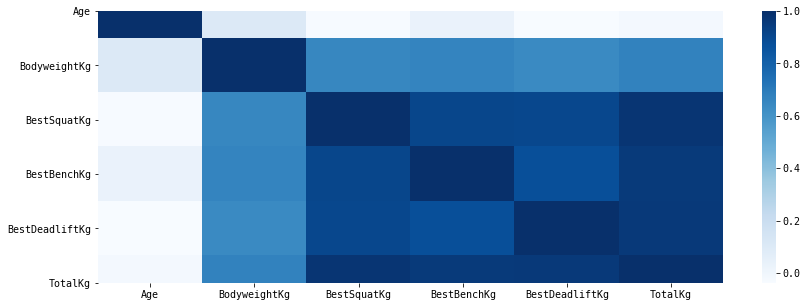

In [42]:
#Тепловая карта
fig = plt.figure(figsize= (14,5))
sns.heatmap(df[cols].dropna().corr(), cmap = 'Blues')

### Упражнение

In [47]:
import pandas as pd
partizan = pd.read_excel('files/lesson_2/partizan.xlsx')
partizan.head()

,Unnamed: 0,chain_name,lon,lat,orders
0,0,Shokoladnica_msk,37.723367,55.782623,71
1,1,Kofje_Khauz_mir,37.723645,55.781909,69
2,2,Shokoladnica_msk,37.752526,55.789558,56
3,3,Sushi_Sjet_vlm,37.722388,55.780846,54
4,4,Burger_King_grval,37.733671,55.813941,45


Text(0.5, 0, 'Заказы')

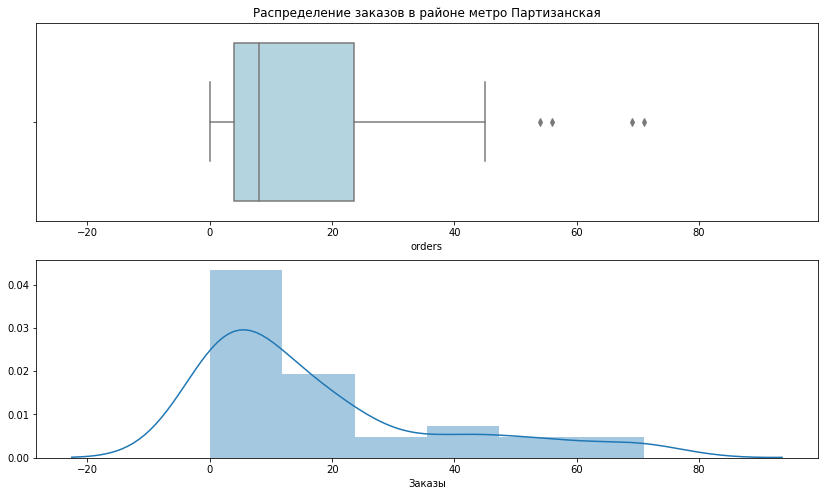